# Chapter 3. Molecular Dynamics

Molecular Dynamics (MD) is a powerful computational technique used in the field of computational chemistry to simulate the time evolution of a molecular system. While the previous chapter introduced the concept of Molecular Mechanics, which focuses on static energy calculations and geometry optimization, Molecular Dynamics takes a dynamic approach by simulating how molecules move and interact over time.

Molecular Dynamics has a wide range of applications in chemistry, biology, and materials science. It is used to study processes such as protein folding, ligand binding, chemical reactions, and material properties. By simulating the dynamic behavior of molecules, researchers can gain valuable insights into the structure, function, and properties of complex systems.

## 3.1. Fundamentals of Molecular Dynamics

### 3.1.1. Newton's Equations of Motion

MD simulations are based on Newton's equations of motion, which describe how the positions and velocities of particles change in response to forces. By numerically solving these equations, MD simulations can provide insights into the dynamics and thermodynamics of a molecular system.

Newton's Second Law of Motion:
$$F = ma = m \frac{d^2\mathbf{r}}{dt^2}$$

Where:
- $F$ represents the force applied to an object.
- $m$ represents the mass of the object.
- $\mathbf{r}$ is the position vector of the object.
- $\frac{d^2\mathbf{r}}{dt^2}$ is the second derivative of the position vector with respect to time, representing acceleration.

Beside that, we know the relationship between force and potential energy:
\$$F = -\nabla E_{\text{potential}}$$

Where:
- $F$ represents the force applied to an object.
- $\nabla$ represents the gradient operator.
- $E_{\text{potential}}$ represents the potential energy of the system.

If one knows the forces acting upon the body, one can find the position of the body at any moment r(t), i.e. predict its dynamics. This can be done by solving Newton’s equation of motion. It is a second order ODE that can be solved analytically for a few simple cases: constant force, harmonic oscillator, periodic force, drag force, etc. However, a more general approach is to use computers in order to solve the ODE numerically.

### 3.1.2. Kinetic Energy

The kinetic energy $(E_{\text{kinetic}}$) of a molecular system can be calculated using the velocities of the particles (atoms) within the system. The kinetic energy is a measure of the energy associated with the motion of the particles and is typically calculated as:

$$E_{\text{kinetic}} = \sum_{i} \frac{1}{2} m_i v_i^2$$

Where:
- $E_{\text{kinetic}}$ is the kinetic energy of the system.
- $i$ represents individual particles (atoms) in the system.
- $m_i$ is the mass of particle $i$.
- $v_i$ is the velocity of particle $i$.

In molecular mechanics simulations, the kinetic energy can be calculated based on the velocities of particles. It's important to note that molecular mechanics simulations often assume that atoms have classical kinetic energy, and their velocities are determined by temperature.

To obtain the kinetic energy in molecular mechanics simulations, you typically need to perform a simulation that includes a description of the velocities of the particles. The kinetic energy is then calculated based on the velocities of the atoms during the simulation.

It's worth mentioning that kinetic energy is a key component of the total energy of the system, and it is often used to calculate the temperature of the system through the equipartition theorem. In molecular mechanics simulations, the kinetic energy is not explicitly minimized or optimized, as it depends on the initial velocities of the particles and the simulation conditions.

### 3.1.3. Simulation of Dynamics of Particles

There are many methods for solving ordinary differential equations (ODEs). The second-order ODE is transformed into a system of two first-order ODEs as follows:

$$\frac{dr(t)}{dt} = v(t)$$

$$m\frac{dv(t)}{dt} = F(t)$$

We use a finite difference approximation that leads to a simple forward Euler algorithm:

$$v_{n+1} = v_n + \frac{F_n}{m} \cdot \Delta t$$

$$r_{n+1} = r_n + v_{n+1} \cdot \Delta t$$

Here we discretize time $t$ with a time step $\Delta t$, so $t_{n+1} = t_n + \Delta t$, and $r_n = r(t_n)$, $v_n = v(t_n)$, where $n$ is the timestep number. Using this method, computing dynamics is straightforward.

In Molecular Dynamics, the positions and velocities of atoms within a molecular system are updated over discrete time steps (time evolution). The simulation proceeds in small time increments, allowing us to study the behavior of molecules in a dynamic and time-dependent manner.

## 3.2. Ensemble Simulations

In ensemble simulations, we explore the behavior of molecular systems by simulating them under different conditions. These simulations often fall into two main categories:

   **Molecular Dynamics (MD) Simulations**: MD simulations involve solving equations of motion to evolve the system over time. They provide a dynamic view of the system's behavior, tracking how it changes as a function of time.

   **Monte Carlo (MC) Simulations**: In contrast to MD simulations, MC simulations focus on sampling different configurations of the system in a probabilistic manner. Rather than evolving the system over time, MC simulations make random moves to explore various states and configurations. This approach is particularly useful for systems in which changes occur less frequently or when configurational changes are of interest.

While MD simulations are well-suited for studying dynamic processes, MC simulations are valuable for exploring the equilibrium properties and thermodynamics of a system. Both techniques play essential roles in understanding molecular behavior and are valuable tools in computational chemistry.

MD simulations are powerful tools for sampling different conformations and properties of a molecular system. By averaging over the trajectories of multiple simulations, we can compute various thermodynamic and structural properties, such as diffusion coefficients, radial distribution functions, and thermodynamic quantities.

## 3.3. Molecule Dynamics Simulation

In the following section, we will run molecular dynamics simulation using [openmm](https://openmm.org/). To install openmm, run the following command:

In [ ]:
!conda install -c conda-forge openmm

### 3.4.1. Gas Phase Simulation

In the following section, we will simulate the dynamics of ethane molecules in the gas phase using OpenMM. The gas phase simulation allows us to observe the behavior of individual molecules as they move and interact:

In [1]:
# Import modules
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import openmm
from openmm import unit, HarmonicBondForce
from openmm.app import PDBFile, PDBReporter, StateDataReporter
from openmm.app.element import Element
from utils import View3DModel
import py3Dmol

In [2]:
# Create a molecule of ethane and optimizer its geometry
ethane_smiles = 'CC'
ethane_mol = Chem.MolFromSmiles(ethane_smiles)
ethane_mol = Chem.AddHs(ethane_mol)
AllChem.EmbedMolecule(ethane_mol)
AllChem.UFFOptimizeMolecule(ethane_mol, maxIters=200)

# View 3D model
View3DModel(ethane_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
# Save the molecule as PDB file
Chem.MolToPDBFile(ethane_mol, './structures/ethane.pdb')

# Load PDB file
ethane_pdbfile = PDBFile('./structures/ethane.pdb')

In [4]:
# Create an OpenMM system
system = openmm.System()

# Create atoms and set their masses
for atom in ethane_mol.GetAtoms():
    symbol = atom.GetSymbol()
    mass = Element.getBySymbol(symbol).mass
    system.addParticle(mass)

In [5]:
# Define the simulation box size and set up periodic boundary conditions (PBC)
box_size = 3.0 * unit.nanometers  # Increased box size for better simulation
system.setDefaultPeriodicBoxVectors((box_size, 0, 0), (0, box_size, 0), (0, 0, box_size))

In [6]:
# Create an OpenMM integrator
temperature = 300 * unit.kelvin
collision_rate = 1.0 / unit.picoseconds
timestep = 2.0 * unit.femtoseconds
integrator = openmm.LangevinIntegrator(temperature, collision_rate, timestep)

# Create an OpenMM simulation
simulation = openmm.app.Simulation(ethane_pdbfile.topology, system, integrator)

In [7]:
# Set positions based on the initial geometry
positions = []
conf = ethane_mol.GetConformer()
for i, atom in enumerate(ethane_mol.GetAtoms()):
    x, y, z = conf.GetAtomPosition(i)
    positions.append((float(x), float(y), float(z)) * unit.angstroms)
        
simulation.context.setPositions(positions)
simulation.context.setVelocitiesToTemperature(temperature)

In [8]:
# Run the MD simulation for a defined number of steps
total_steps = 50  # Number of MD steps
potential_energies = []
kinetic_energies = []
trajectory = ''
for step_idx in range(total_steps):
    integrator.step(1)
    
    state = simulation.context.getState(getPositions=True, getEnergy=True)
    potential_energies.append(state.getPotentialEnergy().value_in_unit(state.getPotentialEnergy().unit))
    kinetic_energies.append(state.getKineticEnergy().value_in_unit(state.getKineticEnergy().unit))
    
    # Save trajectory
    positions = state.getPositions(asNumpy=True)
    conf = ethane_mol.GetConformer()
    for i, position in enumerate(positions):
        position = position * 10 # nn to angstrom
        conf.SetAtomPosition(i, position.tolist())
    trajectory += "MODEL     {:4d}\n".format(step_idx + 1)
    trajectory += Chem.MolToPDBBlock(ethane_mol)
    trajectory += "ENDMDL\n"

Text(0, 0.5, 'Energy (kJ)')

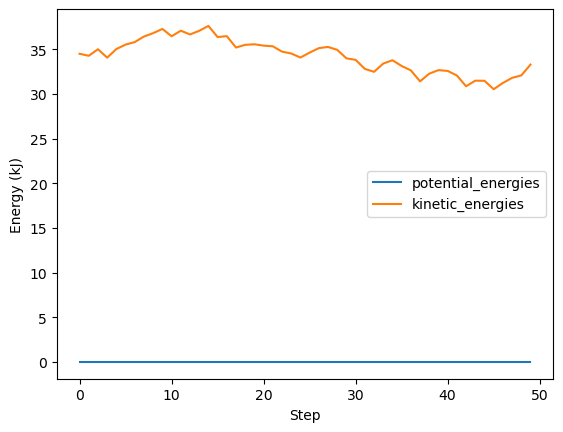

In [9]:
# Visualize the potential and kinetic energy
import matplotlib.pyplot as plt

plt.plot(potential_energies, label='potential_energies')
plt.plot(kinetic_energies, label='kinetic_energies')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Energy (kJ)')

In [10]:
# Show the animation
view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(trajectory, "trajectory", {'keepH': True})
view.setBackgroundColor('white')
view.setStyle({'stick': {'scale': 0.3}, 'sphere': {'scale': 0.3}})
view.zoomTo()
view.animate({'loop': "forward", 'interval': 10}) # Adjust the speed as needed (set 'interval' to a new value in millisecond)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### 3.4.2. Protein Simulation

In the following section, we will simulate the dynamics of a protein. For this, you need to install MDAnalysis and NGLView:

In [ ]:
!conda install -c conda-forge mdanalysis

In [ ]:
!conda install -c conda-forge nglview

In [11]:
# Import modules
from openmm import *
from openmm.app import *
from openmm.unit import *
import MDAnalysis as md
import nglview as ng
from sys import stdout

In [12]:
## View protein file
protein_file_name = './structures/1a3n_chainA.pdb'
u = md.Universe(protein_file_name)
ng.show_mdanalysis(u, gui=True)

NGLWidget()

In [13]:
## Loading protein file
protein_pdb = PDBFile(protein_file_name)

## Choosing forcefield
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')

# Create a combined system for the protein-ligand complex
system = forcefield.createSystem(protein_pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds)

## Set up integrator
temperature = 300*kelvin
frictionCoeff = 1/picosecond
time_step = 0.002*picoseconds
integrator = LangevinIntegrator(temperature, frictionCoeff, time_step)

In [14]:
## Create a simulation object
simulation = Simulation(protein_pdb.topology, system, integrator)

In [15]:
## Initialize the position and minimize energy
simulation.context.setPositions(protein_pdb.positions)
simulation.minimizeEnergy()

## Set up reporters
total_steps = 10000
pdb_reporter = PDBReporter('./trajectories/traj.pdb', 1000)
state_data_reporter = StateDataReporter(stdout, 500, step=True, potentialEnergy=True, temperature=True, progress=True, totalSteps = total_steps)
simulation.reporters.append(pdb_reporter)
simulation.reporters.append(state_data_reporter)

In [16]:
## Run simulation
simulation.step(total_steps)

#"Progress (%)","Step","Potential Energy (kJ/mole)","Temperature (K)"
5.0%,500,-6558.61491509575,203.61059163668392
10.0%,1000,-5283.66822167534,267.6868307665001
15.0%,1500,-4982.782082759324,290.2755724430151
20.0%,2000,-4862.232232295457,294.5129635471319
25.0%,2500,-4732.769150935594,303.25771615203746
30.0%,3000,-4984.721543513719,296.60428821484436
35.0%,3500,-4901.82837792534,299.68421384288644
40.0%,4000,-4860.081277095262,295.3039459142403
45.0%,4500,-5048.871331416551,296.63507371361
50.0%,5000,-5059.595559321824,297.5325592028337
55.0%,5500,-5159.715707026902,304.65505829253357
60.0%,6000,-5306.664864741746,300.5905853784555
65.0%,6500,-5217.2457973589335,292.1925609475847
70.0%,7000,-5176.90177270073,297.0801340746874
75.0%,7500,-5021.870766841355,302.7135883744503
80.0%,8000,-5113.5407192339335,303.9109910547425
85.0%,8500,-5247.506661616746,302.1165048242047
90.0%,9000,-5329.416253291551,306.27410442868376
95.0%,9500,-4977.835732661668,303.21892738116696
100.0%,10000,-537

In [17]:
## Visualize the result
sys = md.Universe(protein_file_name, './trajectories/traj.pdb')
ng.show_mdanalysis(sys, gui=True)

NGLWidget(max_frame=9)

 ### 3.4.2. Molecular Dynamics Simulation and Docking Software

There are several free and user-friendly software tools with graphical user interfaces (GUIs) that are popular for molecular dynamics simulations:

- **VMD (Visual Molecular Dynamics) & NAMD (Nanoscale Molecular Dynamics)**

- **GROMACS**

- **AmberTools**

- **LAMMPS (Large-scale Atomic/Molecular Massively Parallel Simulator)**

- **CHARMM-GUI**

- **Molecular Operating Environment (MOE)**

- **Desmond**

These software tools cater to a range of user needs, from beginners to advanced users, and offer various features for setting up, running, and analyzing molecular dynamics simulations.

Additionally, here are some other software that are focused on protein simulation, including protein-ligand interaction, docking, and related tasks:

- **UCSF Chimera & ChimeraX**

- **AutoDock and AutoDock Vina**

- **AutodockTools**

- **MGLTools**

- **PyRx**

- **SwissDock**

- **LeDock**

- **BIOVIA Discovery Studio**

- **Maestro**